## ***Reading and checking the data***

In [29]:
# dowloading tidyverse packages and library 
install.packages('tidyverse')
library(tidyverse)

# Installing our ggbiplot visualisation package

library(devtools)
install_github("vqv/ggbiplot")


# Then Loading our ggbiplot library
#  
library(ggbiplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



In [30]:
#Read the dataset 
salesdf1 <- read_csv("Supermarket_Dataset_1 - Sales Data.csv")

Rows: 1000 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Invoice ID, Branch, Customer type, Gender, Product line, Date, Pay...
dbl  (8): Unit price, Quantity, Tax, cogs, gross margin percentage, gross in...
time (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [31]:
#Checking the head and tail of the data 

head(salesdf1)
tail(salesdf1)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40:00,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22:00,Cash,31.84,4.761905,1.5920,7.7,33.4320
347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33:00,Cash,65.82,4.761905,3.2910,4.1,69.1110
849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28:00,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [32]:
# Lists variables in the dataset
names(salesdf1) 

[1] "Invoice ID"              "Branch"                 
 [3] "Customer type"           "Gender"                 
 [5] "Product line"            "Unit price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross margin percentage" "gross income"           
[15] "Rating"                  "Total"

In [33]:
#The rows and columns in the data 
cat("The dataset has ", dim(salesdf1)[1], "rows and ", dim(salesdf1)[2], " columns")

The dataset has  1000 rows and  16  columns

In [34]:
#checking the datatypes on the columns 
sapply(salesdf1, class)

$`Invoice ID`
[1] "character"

$Branch
[1] "character"

$`Customer type`
[1] "character"

$Gender
[1] "character"

$`Product line`
[1] "character"

$`Unit price`
[1] "numeric"

$Quantity
[1] "numeric"

$Tax
[1] "numeric"

$Date
[1] "character"

$Time
[1] "hms"      "difftime"

$Payment
[1] "character"

$cogs
[1] "numeric"

$`gross margin percentage`
[1] "numeric"

$`gross income`
[1] "numeric"

$Rating
[1] "numeric"

$Total
[1] "numeric"

## ***Tidying the dataset***

In [35]:
## Importing packages for plotting 

library(tidyr)
library(ggplot2)
library(dplyr)

In [36]:
names(salesdf1)<- tolower(names(salesdf1)) # make the column names to lowercase 

names(salesdf1)<- str_replace_all(names(salesdf1), c(" " = "_")) # Replacing the white spaces in the column names 

head(salesdf1)

invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [37]:
# Selecting the numerical data (excluding the categorical variables)

sale1 <- salesdf1[,c(6,7,12,14,15,16)]
head(sale1)

unit_price,quantity,cogs,gross_income,rating,total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74.69,7,522.83,26.1415,9.1,548.9715
15.28,5,76.40,3.8200,9.6,80.2200
46.33,7,324.31,16.2155,7.4,340.5255
58.22,8,465.76,23.2880,8.4,489.0480
86.31,7,604.17,30.2085,5.3,634.3785
85.39,7,597.73,29.8865,4.1,627.6165


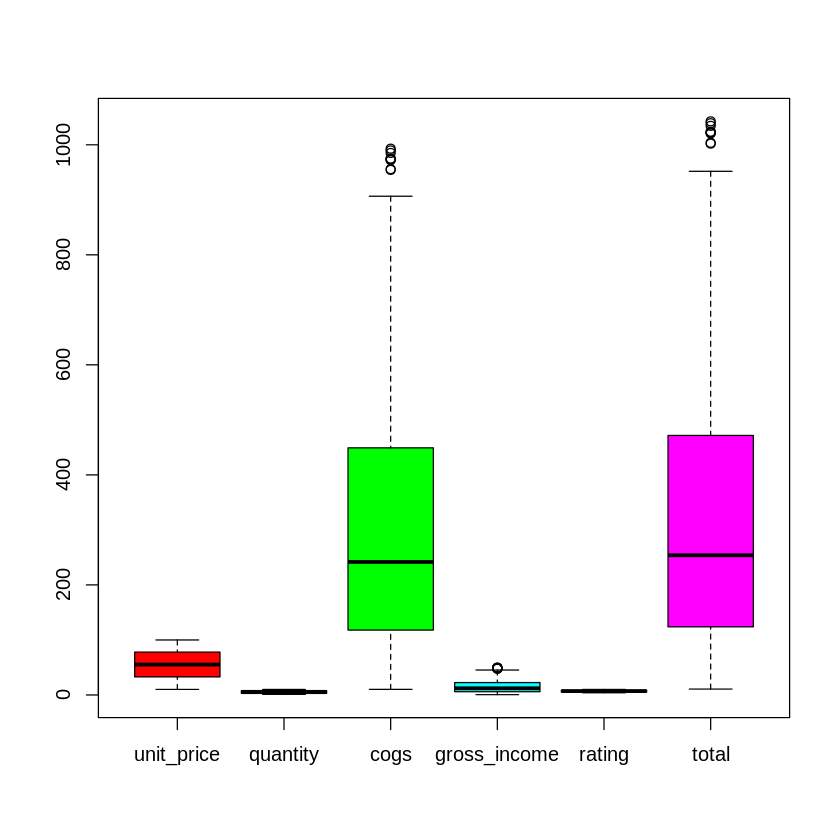

In [38]:
#Checking for outliers 
boxplot(sale1, col = rainbow(ncol(sale1)))

In [39]:
# Listing the outliers 
OutVals = boxplot(sale1, plot=FALSE)$out
OutVals

[1]  955.800  989.800  993.000  954.400  972.100  985.200  975.000  973.700
 [9]  973.800   47.790   49.490   49.650   47.720   48.605   49.260   48.750
[17]   48.685   48.690 1003.590 1039.290 1042.650 1002.120 1020.705 1034.460
[25] 1023.750 1022.385 1022.490

In [40]:
#Removing outliers 
sales <-salesdf1

sales<- salesdf1[-which(salesdf1$cogs %in% OutVals),]
sales<- salesdf1[-which(salesdf1$gross_income %in% OutVals),]
sales<- salesdf1[-which(salesdf1$total %in% OutVals),]
#check the difference 
print(dim(salesdf1))
print(dim(sales))

[1] 1000   16
[1] 991  16


In [41]:
head(sales)

invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [42]:
#checking for duplicates 

table(duplicated(sales))


FALSE 
  991 

In [43]:
# Checking the number of missing per column/variable
colSums(is.na(sales))  

invoice_id                  branch           customer_type 
                      0                       0                       0 
                 gender            product_line              unit_price 
                      0                       0                       0 
               quantity                     tax                    date 
                      0                       0                       0 
                   time                 payment                    cogs 
                      0                       0                       0 
gross_margin_percentage            gross_income                  rating 
                      0                       0                       0 
                  total 
                      0

## ***Exploratory Data Analysis***

***Univariate analysis***

In [44]:
#summary of the dataset 
#Basic descriptive statistics and frequencies.

summary(salesdf1)    

  invoice_id           branch          customer_type         gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 product_line         unit_price       quantity          tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

In [45]:
#Descriptive statistics for each column 

desc_stats <- data.frame(
  Min = apply(sale1, 2, min),    # minimum
  Max = apply(sale1, 2, max),     # Maximum
  Med = apply(sale1, 2, median), # median
  Mean = apply(sale1, 2, mean),  # mean
  variance= apply(sale1, 2, var),  #Variance 
  SD = apply(sale1, 2, sd)   # Standard deviation
  ) 


#get the min,max, median, mean , variance and standard deviation of numerical variables 
desc_stats <- round(desc_stats, 1)
print(desc_stats)

#Get the mode 

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}


attach(sale1)
 print("The mode of the unit_price column is " )
getmode(unit_price);

 print("The mode of the quantity column is " )
 getmode(quantity); 

print("The mode of the cogs column is " )
 getmode(cogs);


print("The mode of the gross_income column is " )
 getmode(gross_income);

print("The mode of the rating  column is " )
 getmode(rating);
 print("The mode of the total  column is " )
 getmode(total);

              Min    Max   Med  Mean variance    SD
unit_price   10.1  100.0  55.2  55.7    702.0  26.5
quantity      1.0   10.0   5.0   5.5      8.5   2.9
cogs         10.2  993.0 241.8 307.6  54838.6 234.2
gross_income  0.5   49.6  12.1  15.4    137.1  11.7
rating        4.0   10.0   7.0   7.0      3.0   1.7
total        10.7 1042.7 253.8 323.0  60459.6 245.9


The following objects are masked from sale1 (pos = 6):

    cogs, gross_income, quantity, rating, total, unit_price




[1] "The mode of the unit_price column is "


[1] 83.77

[1] "The mode of the quantity column is "


[1] 10

[1] "The mode of the cogs column is "


[1] 789.6

[1] "The mode of the gross_income column is "


[1] 39.48

[1] "The mode of the rating  column is "


[1] 6

[1] "The mode of the total  column is "


[1] 829.08

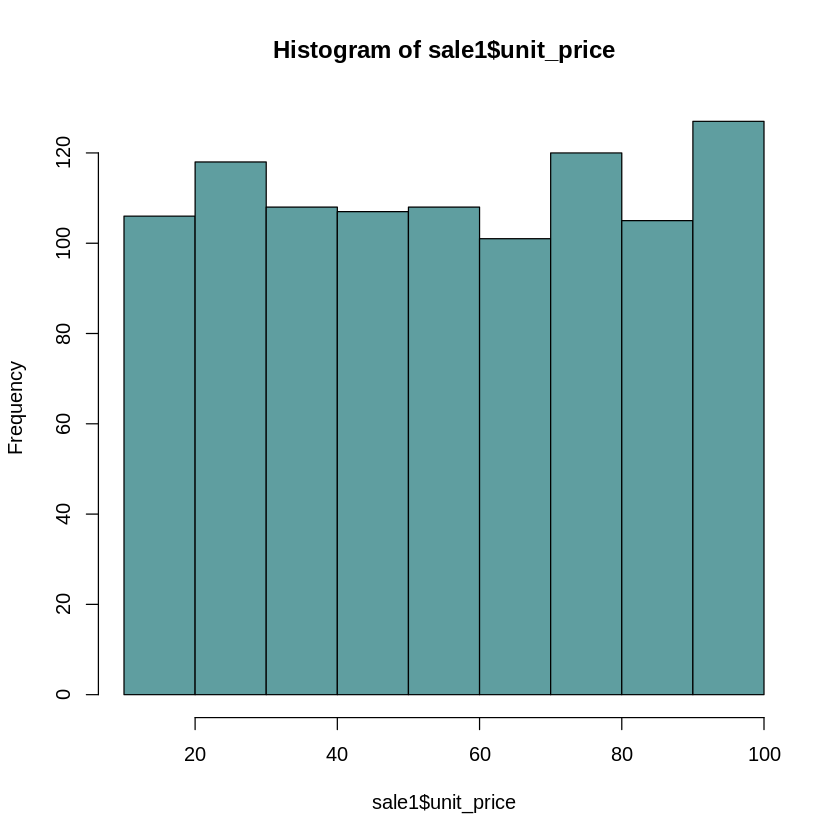

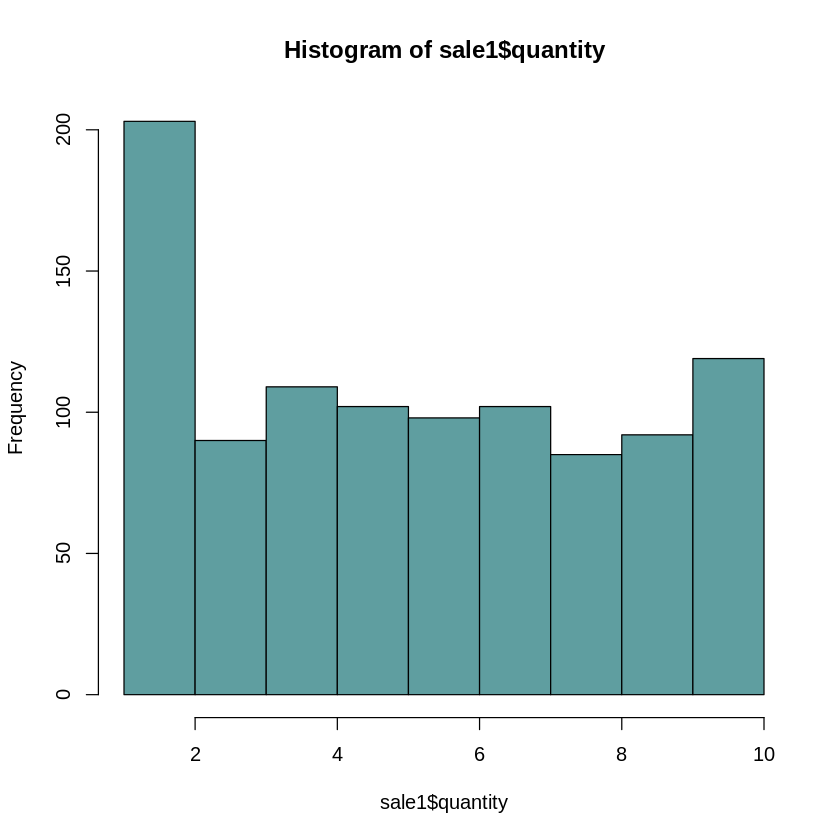

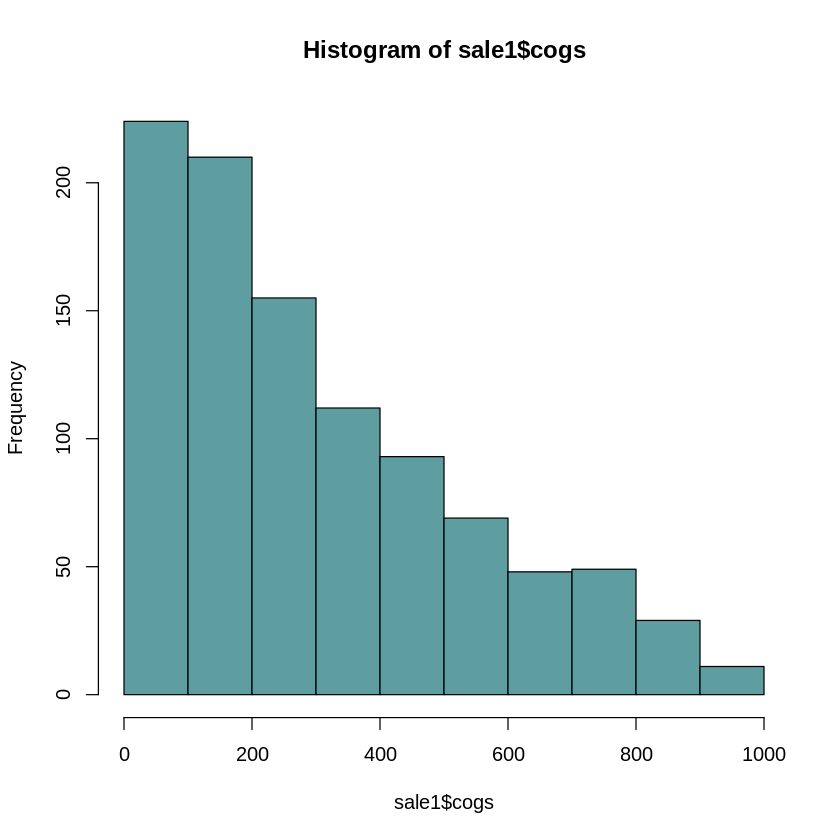

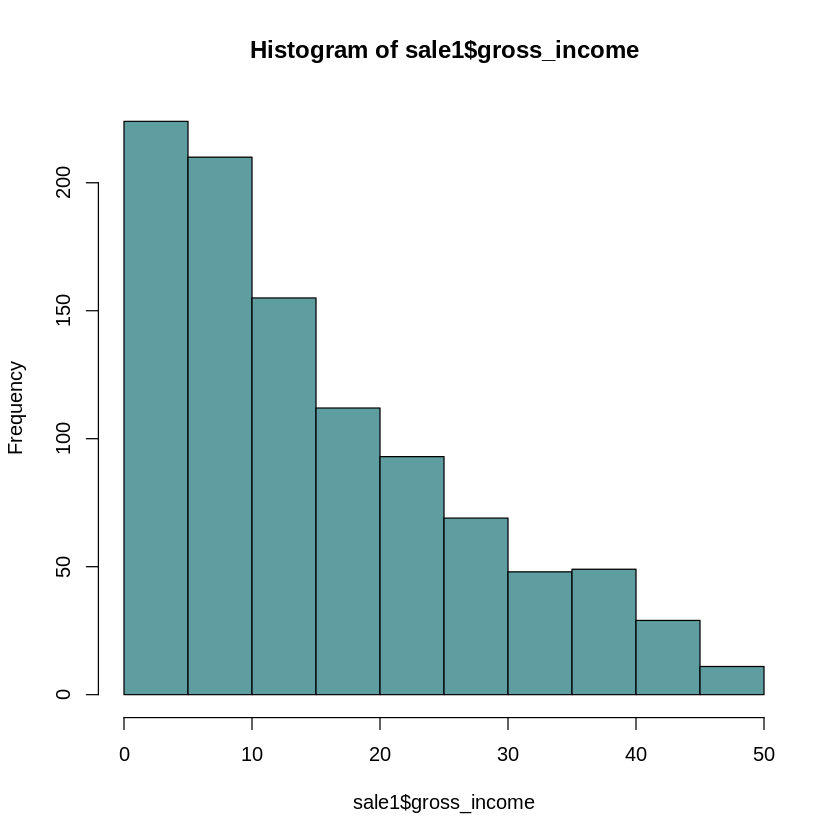

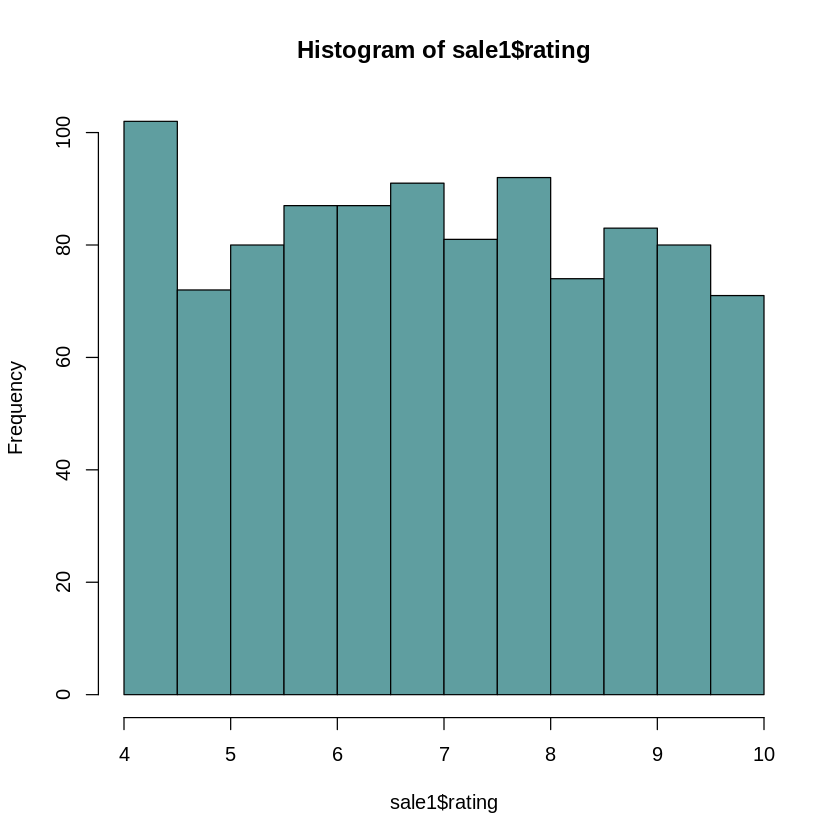

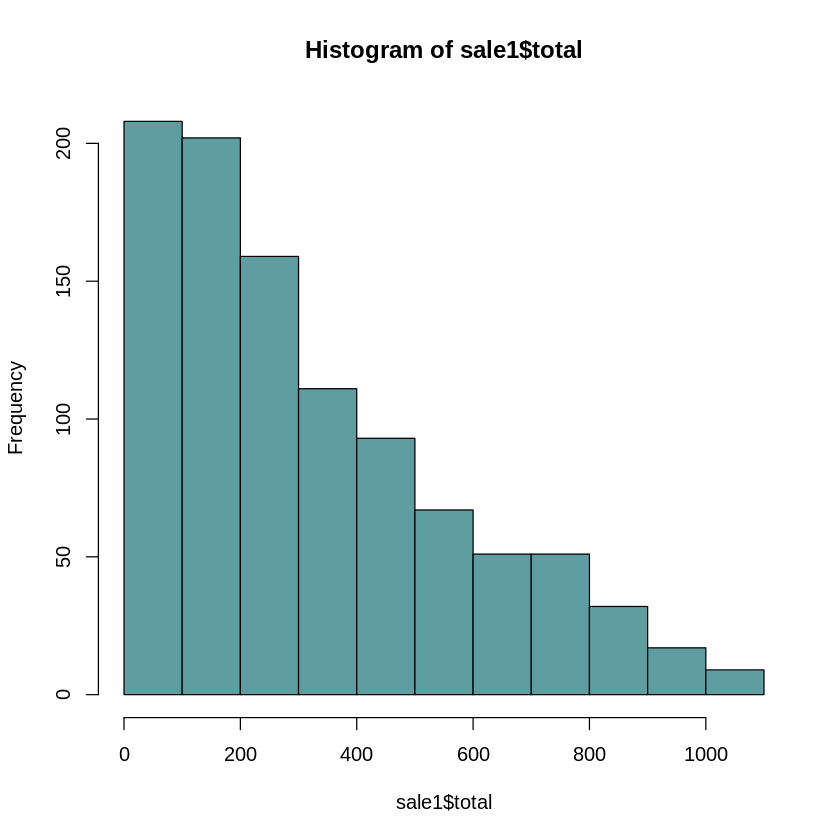

In [46]:
#See the  distribution of numeric variables
hist(sale1$unit_price, col='cadetblue')
hist(sale1$quantity, col='cadetblue')
hist(sale1$cogs, col='cadetblue')
hist(sale1$gross_income, col='cadetblue')
hist(sale1$rating, col='cadetblue')
hist(sale1$total, col='cadetblue')

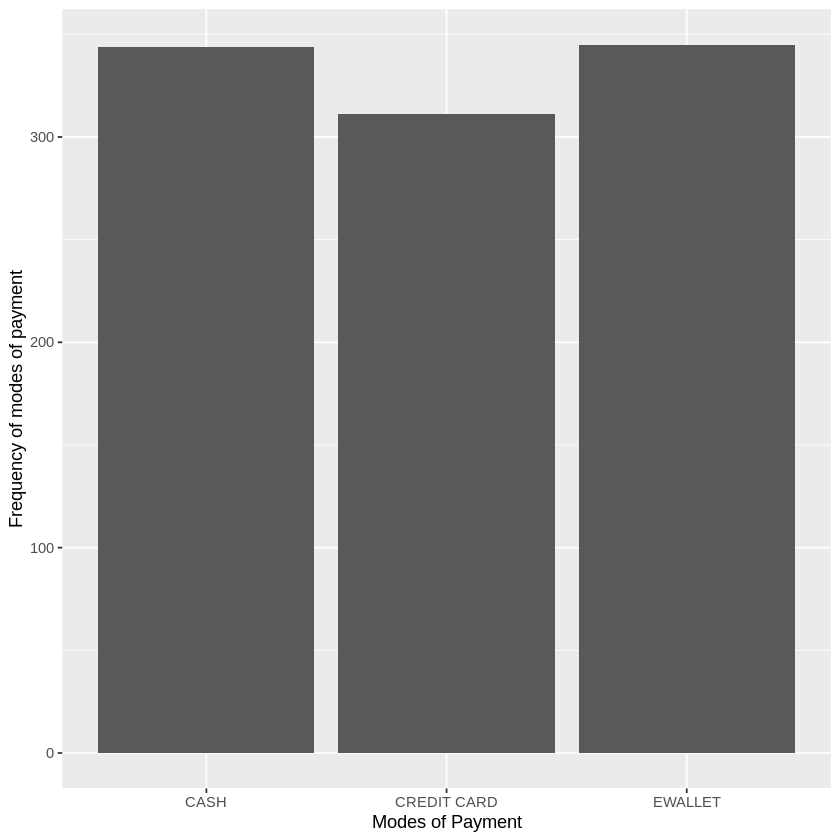

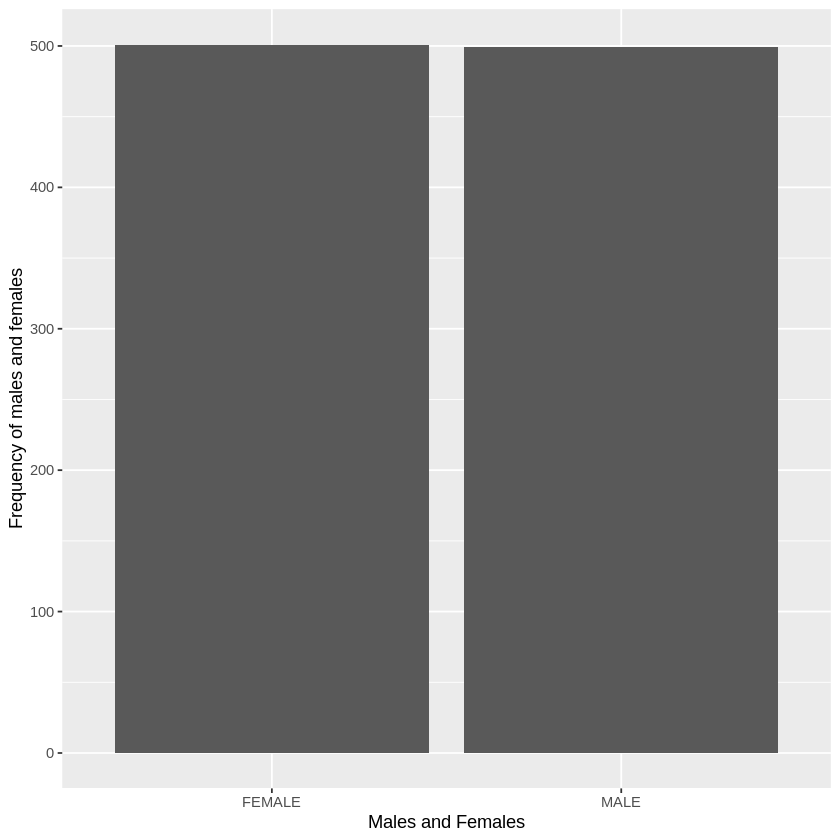

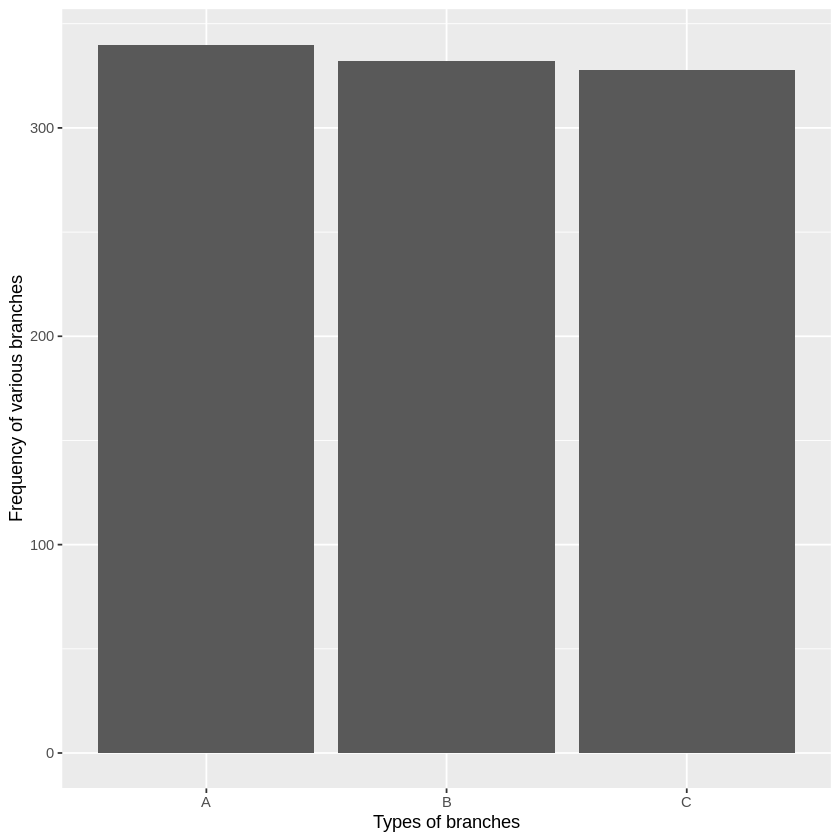

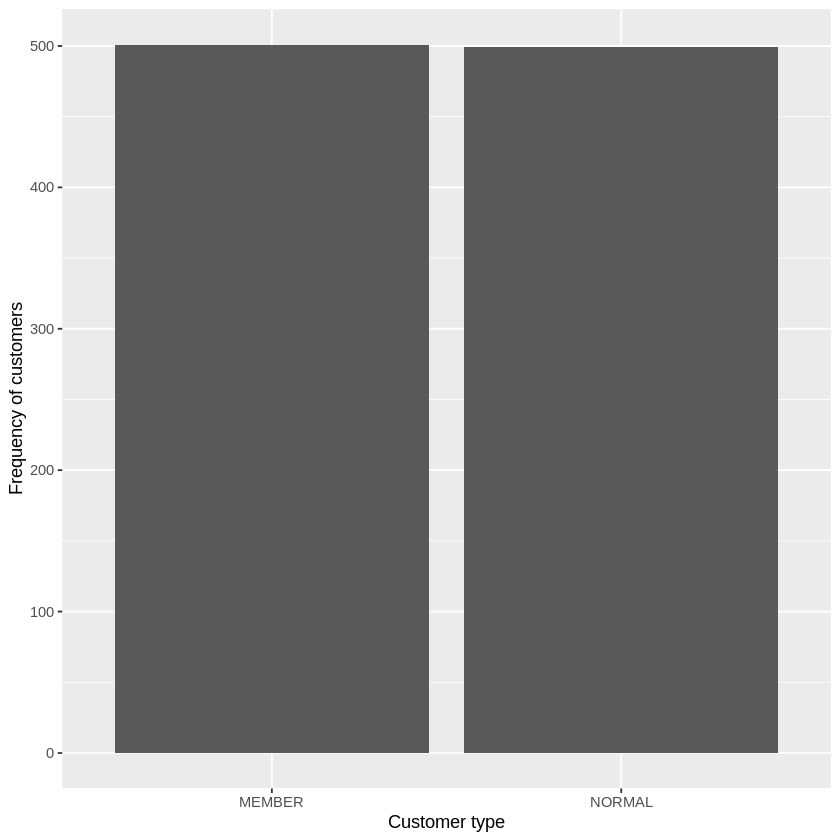

In [47]:
#See the  distribution of categorical variables 
ggplot(salesdf1,aes(x=toupper(payment)))+geom_bar()+xlab(label = "Modes of Payment")+ylab(label = "Frequency of modes of payment")
ggplot(salesdf1,aes(x=toupper(gender)))+geom_bar()+xlab(label = "Males and Females")+ylab(label = "Frequency of males and females")
ggplot(salesdf1,aes(x=toupper(branch)))+geom_bar()+xlab(label = "Types of branches")+ylab(label = "Frequency of various branches")
ggplot(salesdf1,aes(x=toupper(customer_type)))+geom_bar()+xlab(label = "Customer type")+ylab(label = "Frequency of customers")

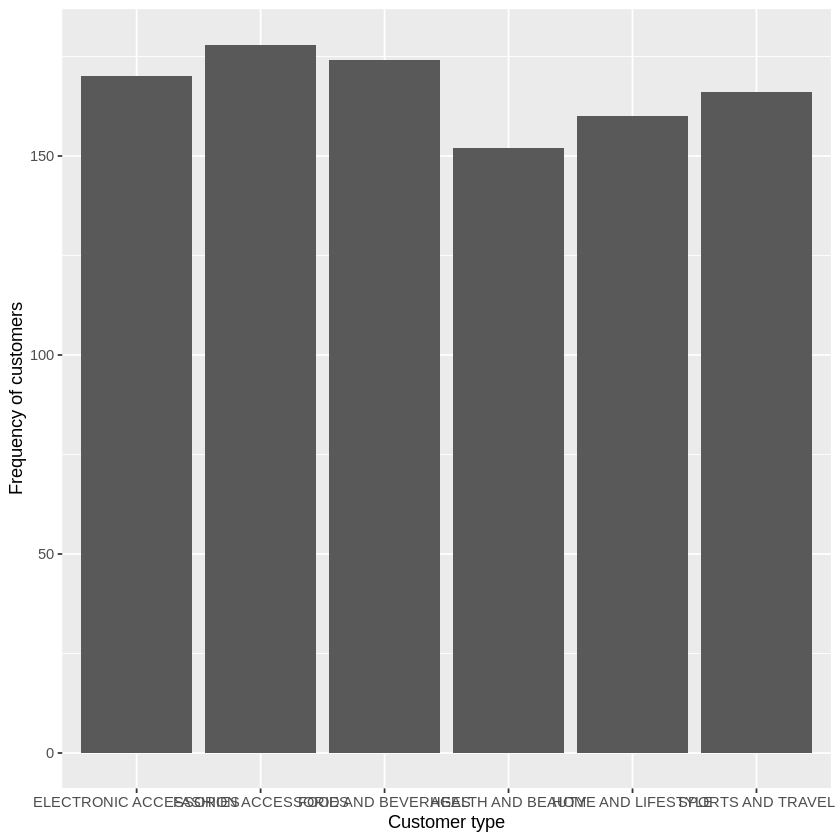

In [48]:
# Margins area
par(oma=c(0,0,0,0)) # all sides have 3 lines of space
par(mar=c(0,0,0,0) + 0.1)
ggplot(salesdf1,aes(x=toupper(product_line)))+geom_bar()+xlab(label = "Customer type")+ylab(label = "Frequency of customers")

## ***Multivariate analysis***

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



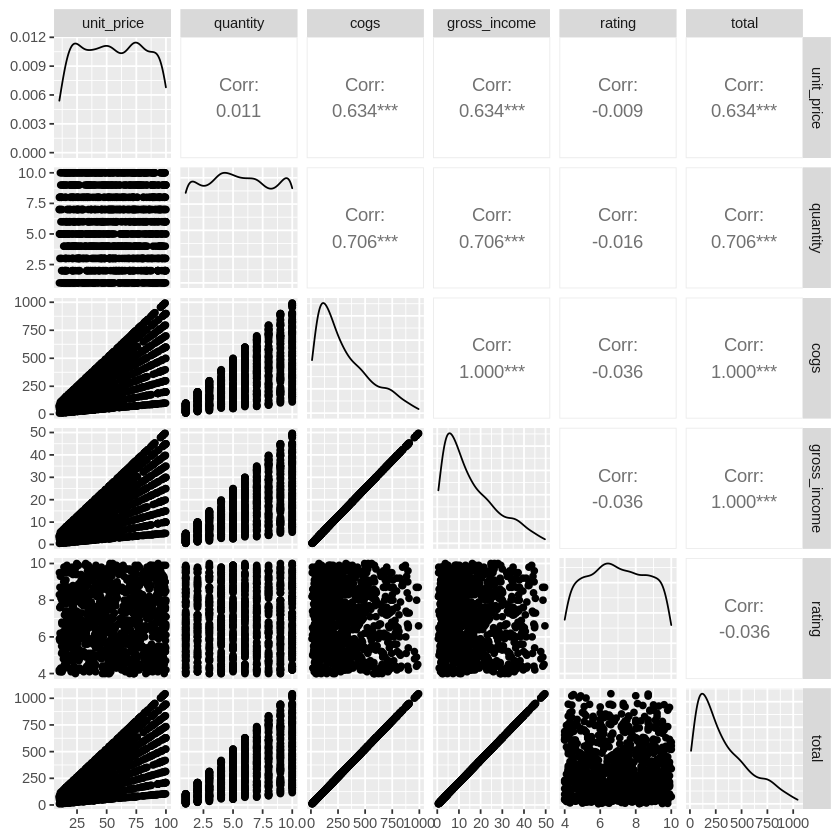

In [49]:
install.packages("GGally")
library(GGally)

ggpairs(sale1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



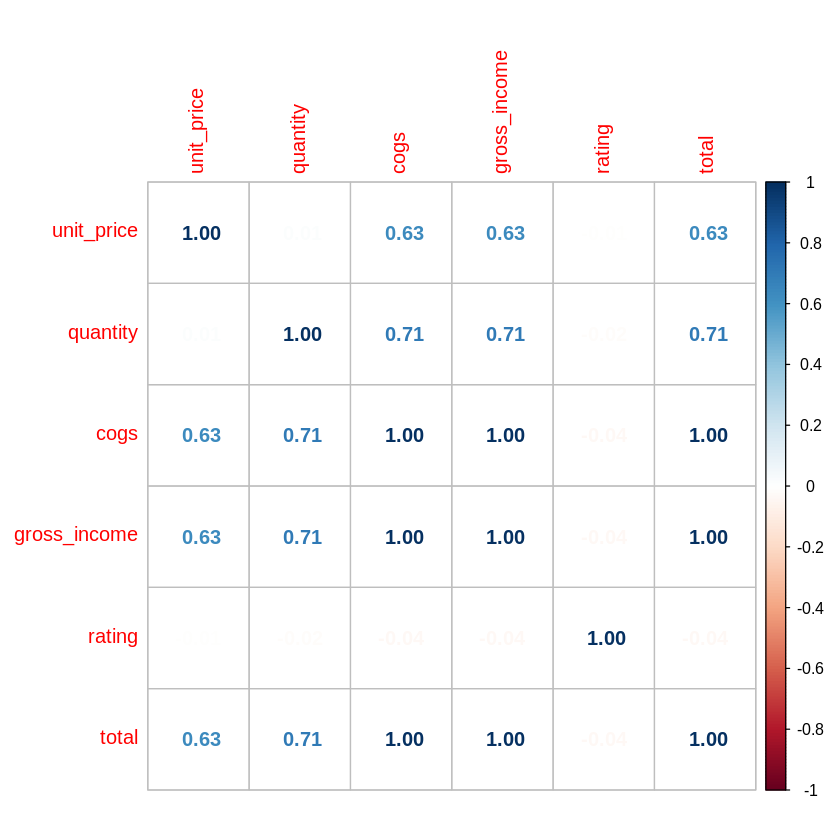

In [50]:
M<-cor(sale1) #find the correlation
install.packages("corrplot")
library(corrplot)
# Margins area
par(oma=c(0,0,0,0)) # all sides have 3 lines of space
par(mar=c(0,0,0,0) + 0.1)
corrplot(M, method="number") #Compute and visualize the correlation co-eeficients  

## ***PCA***

In [51]:
# Install
install.packages("FactoMineR")

# Load
library("FactoMineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [52]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [53]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")


* checking for file ‘/tmp/Rtmpv0y3T6/remotes3c3885c2c7/kassambara-factoextra-1689fc7/DESCRIPTION’ ... OK
* preparing ‘factoextra’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘factoextra_1.0.7.999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [54]:
library("factoextra")

In [55]:
#Convert the data to factors and integers 
sales$branch <- (as.integer(as.factor(sales$branch)))
sales$customer_type <- (as.integer(as.factor(sales$customer_type)))
sales$gender <- (as.integer(as.factor(sales$gender)))
sales$product_line <- (as.integer(as.factor(sales$product_line)))
sales$payment <- (as.integer(as.factor(sales$payment)))

In [56]:
head(sales)

invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,total
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,1,1,1,4,74.69,7,26.1415,1/5/2019,13:08:00,3,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,3,2,1,1,15.28,5,3.8200,3/8/2019,10:29:00,1,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,1,2,2,5,46.33,7,16.2155,3/3/2019,13:23:00,2,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,1,1,2,4,58.22,8,23.2880,1/27/2019,20:33:00,3,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,1,2,2,6,86.31,7,30.2085,2/8/2019,10:37:00,3,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,3,2,2,1,85.39,7,29.8865,3/25/2019,18:30:00,3,597.73,4.761905,29.8865,4.1,627.6165


In [57]:
# Selecting the numerical data (excluding the categorical variables ) 
# we also remove the factor variable total

df <- sales[,c(2:8,11,12, 14,15)]
head(df)

branch,customer_type,gender,product_line,unit_price,quantity,tax,payment,cogs,gross_income,rating
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,1,4,74.69,7,26.1415,3,522.83,26.1415,9.1
3,2,1,1,15.28,5,3.8200,1,76.40,3.8200,9.6
1,2,2,5,46.33,7,16.2155,2,324.31,16.2155,7.4
1,1,2,4,58.22,8,23.2880,3,465.76,23.2880,8.4
1,2,2,6,86.31,7,30.2085,3,604.17,30.2085,5.3
3,2,2,1,85.39,7,29.8865,3,597.73,29.8865,4.1


In [58]:
# We then pass df to the prcomp(). We also set two arguments, center and scale, 
# to be TRUE then preview our object with summary

df.pca <- prcomp(df, center = TRUE, scale. = TRUE)

# Extract the  eigenvalues/variances
get_eig(df.pca)

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,3.909737e+00,3.554306e+01,35.54306
Dim.2,1.131853e+00,1.028957e+01,45.83264
Dim.3,1.069614e+00,9.723766e+00,55.55640
Dim.4,1.034466e+00,9.404241e+00,64.96064
Dim.5,9.895965e-01,8.996332e+00,73.95697
Dim.6,9.529467e-01,8.663151e+00,82.62013
Dim.7,9.221358e-01,8.383053e+00,91.00318
Dim.8,9.046317e-01,8.223925e+00,99.22710
Dim.9,8.501868e-02,7.728971e-01,100.00000


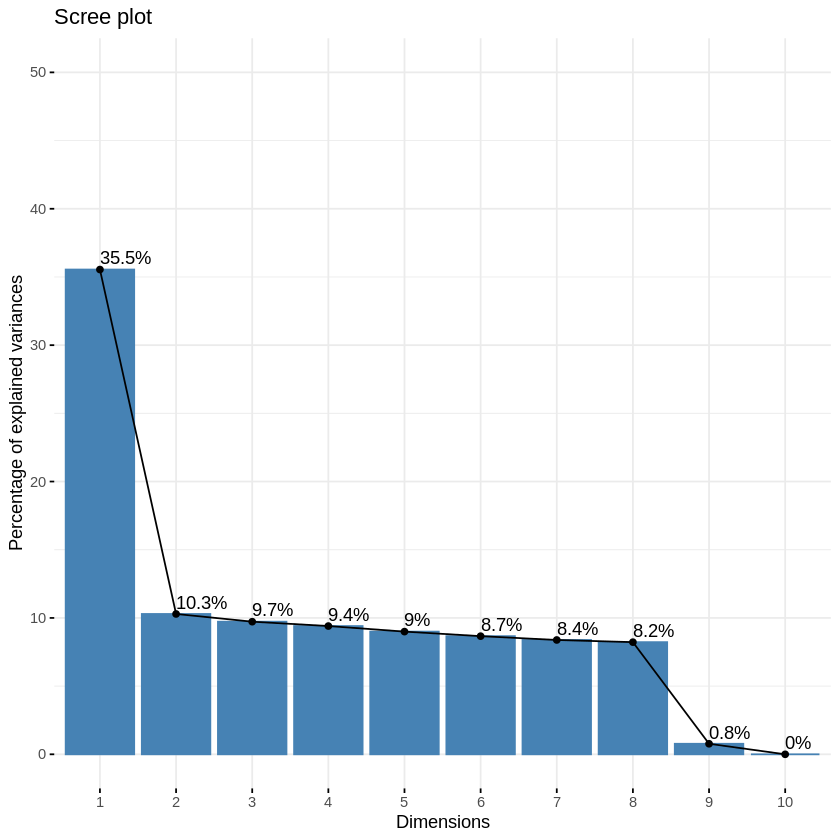

In [60]:
#Visualize our PCA cumulative of variance
fviz_screeplot(df.pca, addlabels = TRUE, ylim = c(0, 50))

In [61]:
# As a result we obtain 12 principal components, 
# each which explain a percentate of the total variation of the dataset
# PC1 explains 35.5% of the total variance, which means that nearly half
# of the information in the dataset (12 variables) can be encapsulated 
# by just that one Principal Component. PC2 explains 10.3% of the variance. etc


# Calling str() to have a look at your PCA object
# ---
# 
str(df.pca)

List of 5
 $ sdev    : num [1:11] 1.977 1.064 1.034 1.017 0.995 ...
 $ rotation: num [1:11, 1:11] 0.0159 -0.0217 -0.0294 0.0176 0.3227 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:11] "branch" "customer_type" "gender" "product_line" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:11] 1.98 1.5 1.5 3.45 55.29 ...
  ..- attr(*, "names")= chr [1:11] "branch" "customer_type" "gender" "product_line" ...
 $ scale   : Named num [1:11] 0.817 0.5 0.5 1.717 26.312 ...
  ..- attr(*, "names")= chr [1:11] "branch" "customer_type" "gender" "product_line" ...
 $ x       : num [1:991, 1:11] 1.911 -2.059 0.175 1.4 2.549 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [62]:
# Installing our ggbiplot visualisation package

library(devtools)
install_github("vqv/ggbiplot")

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



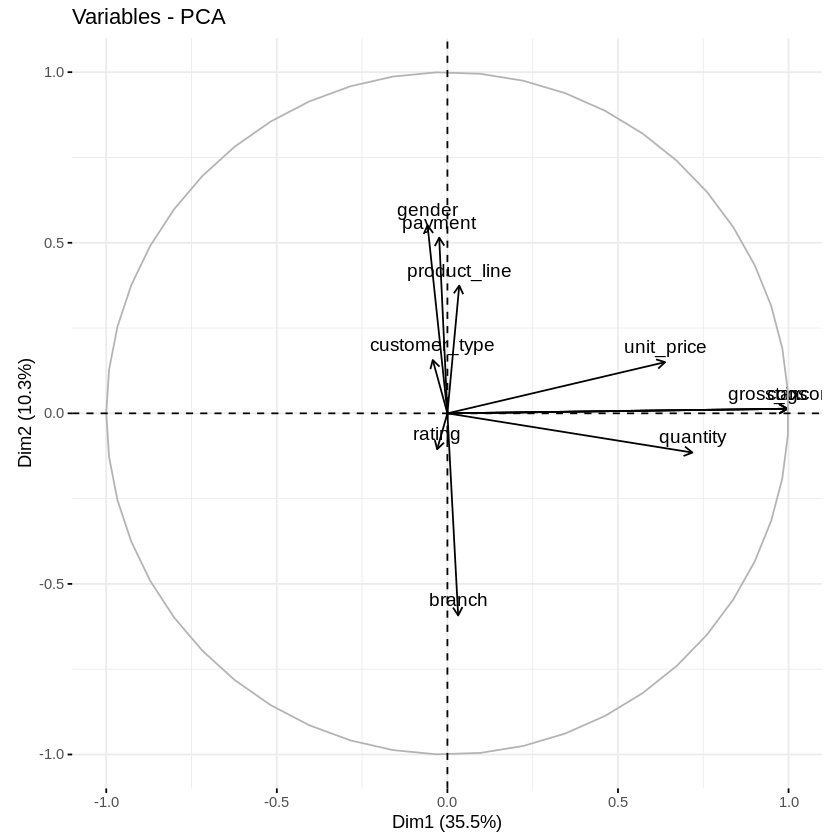

In [63]:
# To plot variables that show PCA1 and PCA2 
#  
fviz_pca_var(df.pca, col.var = "black")

***Variable correlation map***

Positively correlated variables are grouped together. grosss income and unit price

Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants). product line and branch

The distance between variables and the origin measures the quality of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.

From the graph we will see that the variables unit price, gross income and quantity contribute to PC1, with higher values in those variables moving the samples to the right on the plot.

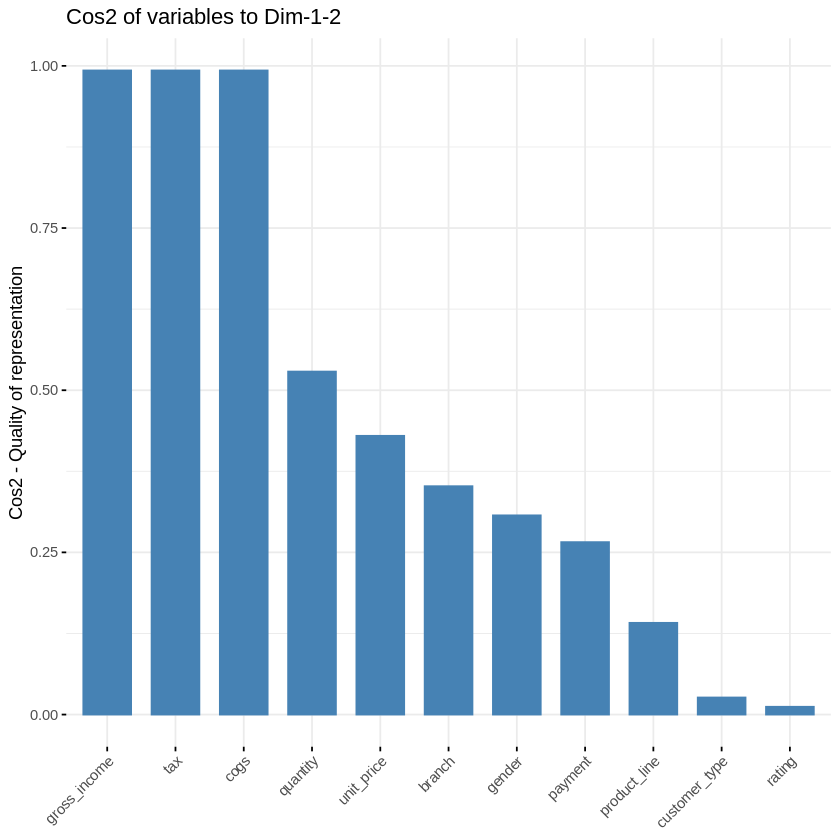

In [64]:
#The quality of representation of the variables on factor map is called cos2
# Total cos2 of variables on PCA.1 and PCA.2
fviz_cos2(df.pca, choice = "var", axes = 1:2)

If a variable is perfectly represented by only two principal components , the sum of the cos2 on these two PCs is equal to one. In this case the variables will be gross income,tax and cogs.

In [65]:
var <- get_pca_var(df.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

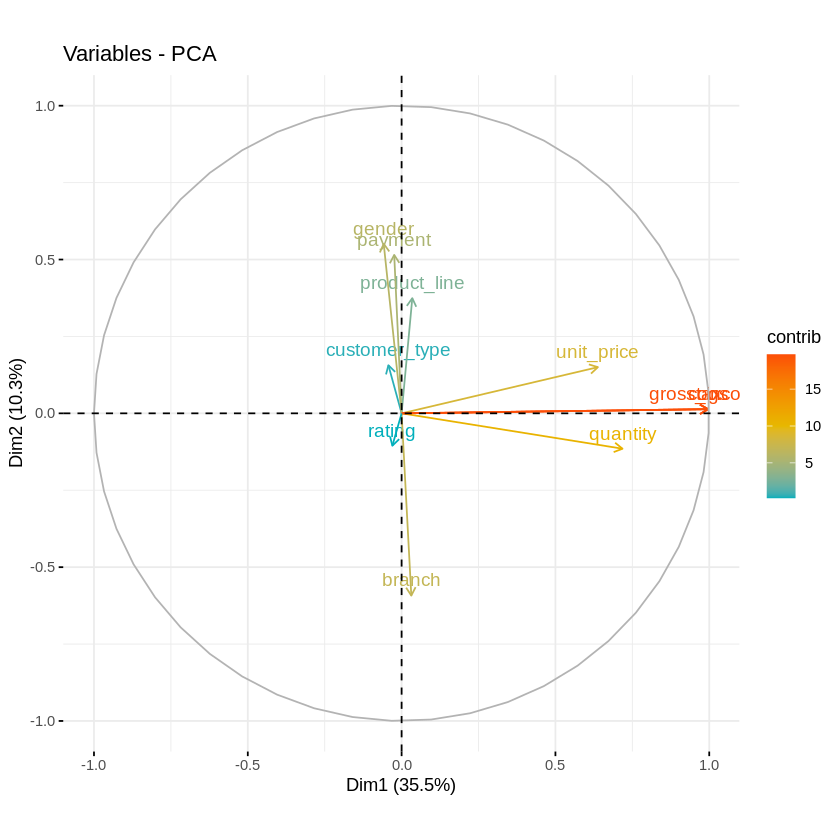

In [66]:
#The most important (or, contributing) variables can be highlighted on the correlation plot
fviz_pca_var(df.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))

Variables that are correlated with PC1 and PC2 are the most important in explaining the variability in the data set. Variables that do not correlated with any PC or correlated with the last dimensions are variables with low contribution and might be removed to simplify the overall analysis.

The highest contributors of variable variation is coggs, tax and gross income